In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob
import geopandas as gpd
import fiona
import os
from scipy.stats import linregress

In [30]:
def cal_data(csv_files,area_name,bins):
    # 初始化湖泊数量的列表
    bin_counts=len(bins) - 1
    lake_counts = np.zeros(bin_counts)
    lake_counts_acumulation = np.zeros(bin_counts)
    
    # 遍历所有CSV文件并统计每个bin中的湖泊数量
    bin_total_areas = np.zeros(len(bins) - 1)
    
    for file in csv_files:
        df = pd.read_csv(file)
        counts, _ = np.histogram(df[area_name], bins=bins)
        lake_counts += counts
        bin_indices = np.digitize(df[area_name], bins) - 1  # 找到每个湖泊所属的bin
        for i in range(len(bins) - 1):
            bin_total_areas[i] += df[area_name][bin_indices == i].sum()

    #计算累计丰度
    lake_counts_acumulation[bin_counts-1]=lake_counts[bin_counts-1]
    for i in np.arange(bin_counts-2,-1,-1):
        lake_counts_acumulation[i]=lake_counts[i]+lake_counts_acumulation[i+1] 
    return lake_counts_acumulation,bin_total_areas

### PLD to csv

In [58]:
p_file_name='PLD'
p_data_dir=os.path.join(r'J:\lakemapping\PLD',f'{p_file_name}.gdb')
p_output_dir=os.path.join(base_dir,f'{p_file_name}_csv')
p_layers = fiona.listlayers(p_data_dir)
p_desired_columns = ['ref_area']
os.makedirs(p_output_dir, exist_ok=True)  # 创建目录，如果目录已存在则不会报错
print(p_layers)

# for layer in p_layers[6:]:
#     if not layer.endswith('pi'):
#         print(f"正在处理图层: {layer}")

#         gdf = gpd.read_file(p_data_dir, layer=layer)
#         output_file = os.path.join(p_output_dir, f"{layer}.csv")
#         filtered_gdf = gdf[p_desired_columns]
#         filtered_gdf.to_csv(p_output_file, index=False)

#         print(f"图层 {layer} 已保存为 {output_file}")

['PLD_af', 'PLD_si', 'PLD_au', 'PLD_gr', 'PLD_Rser', 'PLD_eu', 'PLD_ar', 'PLD_na', 'PLD_sa', 'PLD_af_pi', 'PLD_eu_pi', 'PLD_si_pi', 'PLD_as_pi', 'PLD_au_pi', 'PLD_sa_pi', 'PLD_na_pi', 'PLD_ar_pi', 'PLD_gr_pi', 'PLD_as']


### B to csv

In [312]:
base_dir=r'J:\lakemapping\postprocess\v15_241128'
# b_file_name='4_polygon_afm_mergeWith_BigLake'
# b_file_name='5_polygon_afm_mergeWith_GLAKES_PLD'
b_file_name='4_merge_process'
b_data_dir=os.path.join(base_dir,f'{b_file_name}.gdb')
# b_output_dir=os.path.join(base_dir,f'{b_file_name}_csv_2')
os.makedirs(b_output_dir, exist_ok=True) 
b_layers = fiona.listlayers(b_data_dir)
b_desired_columns = ['Area_bound']#['lake_area']

In [288]:
layers = fiona.listlayers(r'D:\lakemapping\0_auxiliary_data\GLAKES\GLAKES_after_30p_land_mask.gdb')
output_dir=r'J:\lakemapping\postprocess\v15_241128\comparison\GLAKES_after_floodplain_mask'
desired_columns='Area_bound'
print(layers)
for layer in layers:
    if layer.startswith('au2_GLAKES_iwSHIFT_after_mask_gt3ha_keep_arid'):
#     if layer.endswith('_region'):
        print(f"正在处理图层: {layer}")

        gdf = gpd.read_file(r'D:\lakemapping\0_auxiliary_data\GLAKES\GLAKES_after_30p_land_mask.gdb', layer=layer)
        filtered_gdf = gdf[desired_columns]
        output_file = os.path.join(output_dir, f"{layer}.csv")
        filtered_gdf.to_csv(output_file, index=False)

        print(f"图层 {layer} 已保存为 {output_file}")

['au2_GLAKES_iwSHIFT_after_mask_gt3ha', 'au1_GLAKES_iwSHIFT', 'au2_GLAKES_iwSHIFT_after_mask_gt3ha_keep_semi', 'au2_GLAKES_iwSHIFT_after_mask_gt3ha_keep_arid']
正在处理图层: au2_GLAKES_iwSHIFT_after_mask_gt3ha_keep_arid
图层 au2_GLAKES_iwSHIFT_after_mask_gt3ha_keep_arid 已保存为 J:\lakemapping\postprocess\v15_241128\comparison\GLAKES_after_floodplain_mask\au2_GLAKES_iwSHIFT_after_mask_gt3ha_keep_arid.csv


In [251]:
gdf

,Lake_id,Area_bound,Shape_Length,Shape_Area,Continent,geometry
0,188.0,1034.221401,12.0050,0.126717,South_America,"MULTIPOLYGON (((-72.55525 -48.70325, -72.55525..."
1,225.0,860.995679,2.6655,0.092349,South_America,"MULTIPOLYGON (((-73.00175 -41.25950, -73.00175..."
2,335.0,571.542924,16.1240,0.079369,South_America,"MULTIPOLYGON (((-67.73825 -54.58750, -67.73825..."
3,358.0,530.002088,6.0725,0.056698,South_America,"MULTIPOLYGON (((-71.72325 -40.69050, -71.72325..."
4,645.0,302.861199,3.6315,0.036002,South_America,"MULTIPOLYGON (((-72.15350 -47.15400, -72.15350..."
...,...,...,...,...,...,...
3290293,NaN,NaN,0.0125,0.000003,Oceania_Anta,"MULTIPOLYGON (((138.56050 -25.21250, 138.55950..."
3290294,NaN,NaN,0.0145,0.000003,Asia,"MULTIPOLYGON (((77.77975 39.12400, 77.77975 39..."
3290295,NaN,NaN,0.0120,0.000003,Asia,"MULTIPOLYGON (((70.07850 44.15125, 70.07825 44..."
3290296,NaN,NaN,0.0125,0.000003,Asia,"MULTIPOLYGON (((65.27575 45.23075, 65.27575 45..."


In [313]:
print(b_layers)
for layer in b_layers:
#     if layer.startswith('b'):
    if layer.endswith('new'):
        print(f"正在处理图层: {layer}")

        gdf = gpd.read_file(b_data_dir, layer=layer)
    #         no_merge_gdf=gdf[gdf['mwGLAKES_sm']!=1]
    #         filtered_gdf = no_merge_gdf[b_desired_columns]
    #         output_file = os.path.join(b_output_dir, f"{layer}_niwG.csv")
    #         filtered_gdf.to_csv(output_file, index=False)

#         no_merge_gdf=gdf[gdf['mwGLAKES_semi']!=1]
#         filtered_gdf = no_merge_gdf[b_desired_columns]
#         output_file = os.path.join(b_output_dir, f"{layer}_niwG_semi.csv")
#         filtered_gdf.to_csv(output_file, index=False)
    #         no_merge_gdf=gdf[gdf['mwGLAKES_PLD']==1]
    #         filtered_gdf = no_merge_gdf[b_desired_columns]
    #         output_file = os.path.join(b_output_dir, f"{layer}_iwGP.csv")
    #         filtered_gdf.to_csv(output_file, index=False)

        filtered_gdf = gdf[b_desired_columns]
        output_file = os.path.join(b_output_dir, f"{layer}.csv")
        filtered_gdf.to_csv(output_file, index=False)

        print(f"图层 {layer} 已保存为 {output_file}")

# print(f"所有图层数据处理完成，并已保存到 {output_dir} 目录中的 CSV 文件中")

['au1_GLAKES_gte1_Rser', 'au2_GLAKES_gte1_Rser_clip_sp', 'au2_GLAKES_land_mask_iwSHIFT', 'au2_GLAKES_iwSHIFT_nArid', 'GLAKES_for_merge', 'three_dataset_for_merge', 'b_for_merge', 'b_for_merge_point', 'PLD_for_merge', 'GLAKES_for_merge_point', 'au1_PLD_iwSHIFT_Arid', 'PLD_for_merge_point', 'three_dataset_merge_v2', 'three_dataset_dissolve', 'three_dataset_dissolve_SJ', 'GLAKES_for_merge_new']
正在处理图层: GLAKES_for_merge_new
图层 GLAKES_for_merge_new 已保存为 J:\lakemapping\postprocess\v15_241128\4_polygon_afm_mergeWith_BigLake_csv_2\GLAKES_for_merge_new.csv


In [180]:
filtered_gdf.to_csv(output_file, index=False)

In [175]:
base_dir=r'J:\lakemapping\postprocess\v14_241115'
b_file_name='5_polygon_afm_mwBL_BigGLAKES_v1'
b_data_dir=os.path.join(base_dir,f'{b_file_name}.gdb')
b_output_dir=os.path.join(base_dir,f'{b_file_name}_csv')
os.makedirs(b_output_dir, exist_ok=True) 
b_layers = fiona.listlayers(b_data_dir)
b_desired_columns = ['lake_area']
for layer in b_layers:
    if layer.startswith('c'):
        print(f"正在处理图层: {layer}")
        gdf = gpd.read_file(b_data_dir, layer=layer)
        filtered_gdf = gdf[b_desired_columns]
        output_file = os.path.join(b_output_dir, f"{layer}.csv")
        filtered_gdf.to_csv(output_file, index=False)

        print(f"图层 {layer} 已保存为 {output_file}")

# print(f"所有图层数据处理完成，并已保存到 {output_dir} 目录中的 CSV 文件中")

In [ ]:
### calculate

In [65]:
print(bins)

[5.00000000e-03 5.88626326e-03 6.92961904e-03 8.15791239e-03
 9.60392400e-03 1.13062450e-02 1.33103069e-02 1.56695941e-02
 1.84470712e-02 2.17168636e-02 2.55662352e-02 3.00979182e-02
 3.54328541e-02 4.17134214e-02 4.91072360e-02 5.78116238e-02
 6.80588875e-02 8.01225058e-02 9.43244325e-02 1.11043688e-01
 1.30726477e-01 1.53898091e-01 1.81176936e-01 2.13291029e-01
 2.51097429e-01 2.95605115e-01 3.48001905e-01 4.09686166e-01
 4.82304126e-01 5.67793811e-01 6.68436770e-01 7.86918960e-01
 9.26402433e-01 1.09060972e+00 1.28392319e+00 1.51150198e+00
 1.77941971e+00 2.09482658e+00 2.46614014e+00 2.90327003e+00
 3.41788234e+00 4.02371105e+00 4.73692450e+00 5.57655694e+00
 6.56501644e+00 7.72868302e+00 9.09861259e+00 1.07113658e+01
 1.26099838e+01 1.48451369e+01 1.74764768e+01 2.05742286e+01
 2.42210652e+01 2.85143133e+01 3.35685509e+01 3.95186656e+01
 4.65234539e+01 5.47698595e+01 6.44779624e+01 7.59068522e+01
 8.93615431e+01 1.05201114e+02 1.23848290e+02 1.45800728e+02
 1.71644294e+02 2.020687

In [289]:
# 设定面积范围和等间距的bins
min_area = 0.005  # 最小湖泊面积
max_area = 117544  # 最大湖泊面积
bins = np.logspace(np.log10(min_area), np.log10(max_area), 105)
B_c,B_a=cal_data(glob.glob(f"{output_dir}/no_merge/*.csv"),'lake_area',bins)

# # 提取尾部数据（以 bin 较大部分为例）
# tail_indices = bins[:-1] > 0.3  # 选择横轴大于 100 的部分
# tail_x = bins[:-1][tail_indices]
# tail_y = B_c[tail_indices]
# # 对数变换并拟合尾部指数
# log_x = np.log10(tail_x)
# log_y = np.log10(tail_y)
# slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

p_csv_files = glob.glob(f"{p_output_dir}/*.csv")
bins_P=bins[5:]
P_c,P_a=cal_data(p_csv_files,'ref_area',bins_P)

# file=r'J:\lakemapping\postprocess\v15_241128\stastics_excel\GLAKES.csv'
# bins_G = bins[12:]
# G_c,G_a=cal_data([file],'Area_bound',bins_G)

# file=r'J:\lakemapping\postprocess\v15_241128\stastics_excel\HydroLAKES.csv'
# bins_H = bins[18:]
# H_c,H_a=cal_data([file],'Lake_area',bins_H)

In [286]:
print(newG_c)

[2.997239e+06 2.700403e+06 2.423798e+06 2.168136e+06 1.935203e+06
 1.719789e+06 1.523198e+06 1.345305e+06 1.183003e+06 1.036900e+06
 9.056700e+05 7.888960e+05 6.846710e+05 5.921610e+05 5.108630e+05
 4.400870e+05 3.769150e+05 3.223680e+05 2.748480e+05 2.339010e+05
 1.987090e+05 1.687090e+05 1.426490e+05 1.204920e+05 1.016710e+05
 8.581600e+04 7.232600e+04 6.102200e+04 5.145800e+04 4.339200e+04
 3.655800e+04 3.079200e+04 2.608100e+04 2.203800e+04 1.860900e+04
 1.565000e+04 1.319900e+04 1.115900e+04 9.512000e+03 8.098000e+03
 6.928000e+03 5.955000e+03 5.104000e+03 4.351000e+03 3.750000e+03
 3.178000e+03 2.713000e+03 2.305000e+03 1.993000e+03 1.701000e+03
 1.423000e+03 1.220000e+03 1.067000e+03 9.190000e+02 7.910000e+02
 6.850000e+02 5.660000e+02 4.770000e+02 4.030000e+02 3.440000e+02
 2.880000e+02 2.530000e+02 2.120000e+02 1.830000e+02 1.510000e+02
 1.290000e+02 1.120000e+02 1.000000e+02 8.400000e+01 6.900000e+01
 6.100000e+01 5.000000e+01 4.100000e+01 3.200000e+01 2.300000e+01
 2.100000e

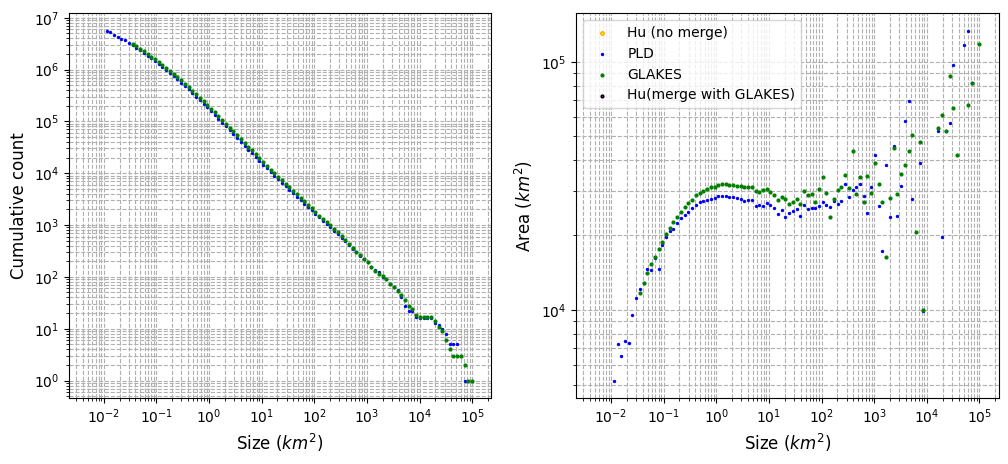

In [277]:
fig=plt.figure(figsize=(12,5))#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(1,2)
color_list=['yellow','blue','green','purple','red']
bound_list=['orange','blue','green','black','red']
label_list=['Hu (no merge)','PLD','GLAKES','Hu(merge with GLAKES)','HydroLAKES']
ax1=plt.subplot(gs[0,0])
ax1.grid(True, which="both", ls="--",zorder=1)
ax1.scatter(bins[:-1], B_c, color=color_list[0], edgecolor=bound_list[0],label=label_list[0],s=6,zorder=2)
ax1.scatter(bins_P[:-1], P_c, color=color_list[1], edgecolor=bound_list[1],label=label_list[1],s=2,zorder=2)
ax1.scatter(bins_G[:-1], G_c, color=color_list[2], edgecolor=bound_list[2],label=label_list[2],s=4,zorder=2)
ax1.scatter(bins_G[:-1], newG_c, color=color_list[3], edgecolor=bound_list[3],label=label_list[3],s=4,zorder=2)
# ax1.scatter(bins_H[:-1], H_c, color=color_list[4], edgecolor=bound_list[4],label=label_list[3],s=2,zorder=2)
# ax1.scatter(bins[:-1], C3_c, color=color_list[3], edgecolor=bound_list[3],label=label_list[3],s=2,zorder=2)
ax1.set_xscale('log')  # 设置x轴为对数尺度
ax1.set_yscale('log')  # 设置y轴为对数尺度
ax1.set_xlabel('Size ($km^2$)', fontsize=12)
ax1.set_ylabel('Cumulative count', fontsize=12)

# 绘制拟合直线
# fitted_y = 10**(intercept + slope * np.log10(tail_x))  # 在原始空间计算直线值
# ax1.plot(tail_x, fitted_y, color='red', label=f'Fitted Line: slope={slope:.2f}',zorder=3)

ax2=plt.subplot(gs[0,1])
ax2.grid(True, which="both", ls="--",zorder=1)
ax2.scatter(bins[:-1], B_a, color=color_list[0], edgecolor=bound_list[0],label=label_list[0],s=6,zorder=2)
ax2.scatter(bins_P[:-1], P_a, color=color_list[1], edgecolor=bound_list[1],label=label_list[1],s=2,zorder=2)
ax2.scatter(bins_G[:-1], G_a, color=color_list[2], edgecolor=bound_list[2],label=label_list[2],s=4,zorder=2)
ax2.scatter(bins_G[:-1], newG_a, color=color_list[3], edgecolor=bound_list[3],label=label_list[3],s=4,zorder=2)
# ax2.scatter(bins_H[:-1], H_a, color=color_list[4], edgecolor=bound_list[4],label=label_list[3],s=2,zorder=2)
# ax2.scatter(bins[:-1], C3_a, color=color_list[3], edgecolor=bound_list[3],label=label_list[3],s=2,zorder=2)

ax2.set_xscale('log')  # 设置x轴为对数尺度
ax2.set_yscale('log')  # 设置y轴为对数尺度
ax2.set_xlabel('Size ($km^2$)', fontsize=12)
ax2.set_ylabel('Area ($km^2$)', fontsize=12)
plt.legend()
# plt.show()

In [ ]:
GLAKES_dir="J:\lakemapping/postprocess/v15_241128/comparison/GLAKES_after_floodplain_mask"
iwSHIFT_raw = pd.read_csv(file)

In [291]:
bins_G = bins[12:]
# newG_c,newG_a=cal_data(glob.glob(GLAKES_dir+"/keep_arid_lake/*.csv"),'Area_bound',bins_G)
newG_c_0,newG_a_0=cal_data(glob.glob(GLAKES_dir+"/no_keep/*.csv"),'Area_bound',bins_G)

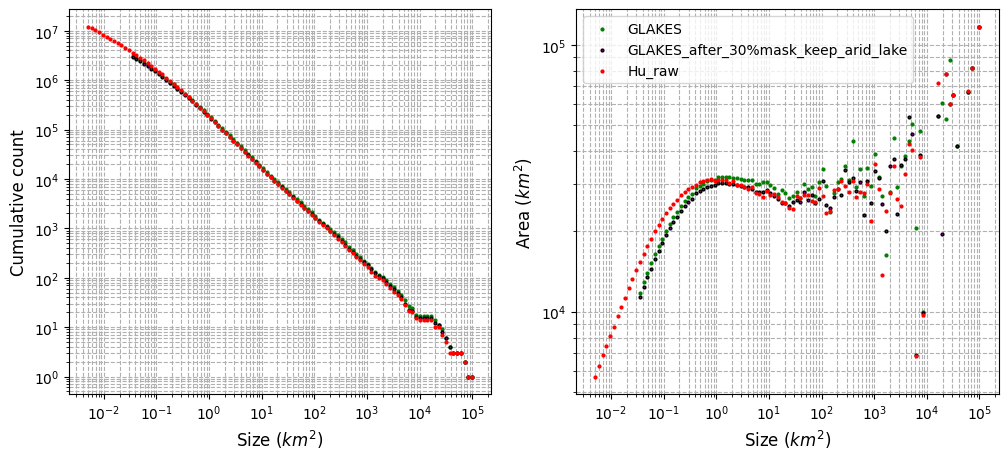

In [324]:
fig=plt.figure(figsize=(12,5))#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(1,2)
color_list=['yellow','blue','green','purple','red']
bound_list=['orange','blue','green','black','red']
ax1=plt.subplot(gs[0,0])
ax1.grid(True, which="both", ls="--",zorder=1)

# ax1.scatter(bins_P[:-1], P_c, color=color_list[0], edgecolor=bound_list[0],label='PLD',s=6,zorder=3)
ax1.scatter(bins_G[:-1], G_c, color=color_list[2], edgecolor=bound_list[2],label='GLAKES',s=4,zorder=2)
ax1.scatter(bins_G[:-1], newG_c, color=color_list[3], edgecolor=bound_list[3],label='GLAKES_after_30%mask_keep_arid_lake',s=4,zorder=2)
# ax1.scatter(bins_G[:-1], newG_c_0, color=color_list[4], edgecolor=bound_list[4],label='GLAKES_after_30%mask',s=3,zorder=2)
ax1.scatter(bins[:-1], B_c, color=color_list[4], edgecolor=bound_list[4],label='Hu_raw',s=4,zorder=3)

ax1.set_xscale('log')  # 设置x轴为对数尺度
ax1.set_yscale('log')  # 设置y轴为对数尺度
ax1.set_xlabel('Size ($km^2$)', fontsize=12)
ax1.set_ylabel('Cumulative count', fontsize=12)

# 绘制拟合直线
# fitted_y = 10**(intercept + slope * np.log10(tail_x))  # 在原始空间计算直线值
# ax1.plot(tail_x, fitted_y, color='red', label=f'Fitted Line: slope={slope:.2f}',zorder=3)

ax2=plt.subplot(gs[0,1])
ax2.grid(True, which="both", ls="--",zorder=1)

# ax2.scatter(bins_P[:-1], P_a, color=color_list[0], edgecolor=bound_list[0],label='PLD',s=6,zorder=3)
ax2.scatter(bins_G[:-1], G_a, color=color_list[2], edgecolor=bound_list[2],label='GLAKES',s=4,zorder=2)
ax2.scatter(bins_G[:-1], newG_a, color=color_list[3], edgecolor=bound_list[3],label='GLAKES_after_30%mask_keep_arid_lake',s=4,zorder=2)
# ax2.scatter(bins_G[:-1], newG_a_0, color=color_list[4], edgecolor=bound_list[4],label='GLAKES_after_30%mask',s=3,zorder=2)
ax2.scatter(bins[:-1], B_a, color=color_list[4], edgecolor=bound_list[4],label='Hu_raw',s=4,zorder=3)
ax2.set_xscale('log')  # 设置x轴为对数尺度
ax2.set_yscale('log')  # 设置y轴为对数尺度
ax2.set_xlabel('Size ($km^2$)', fontsize=12)
ax2.set_ylabel('Area ($km^2$)', fontsize=12)
plt.legend()

In [164]:
# for i in range(1,104):
#     print(f'{bins[i]:.3f}: {(B_c[i]-B_c[i-1]):.0f} {(B_a[i]-B_a[i-1]):.3f}')
for i in range(0,104):
    print(f'{bins[i]:.3f}: before: {(B_c[i]):.0f} {(B_a[i]):.3f}  after:  {(C_c[i]):.0f} {(C_a[i]):.3f} dif a:{((C_a[i]-B_a[i])/B_a[i]):.3f}')


0.005: before: 12185165 5713.138  after:  11834447 5544.806 dif a:-0.029
0.006: before: 11132344 6268.224  after:  10812640 6077.461 dif a:-0.030
0.007: before: 10150945 6866.560  after:  9861076 6653.842 dif a:-0.031
0.008: before: 9237726 7453.293  after:  8976126 7212.030 dif a:-0.032
0.010: before: 8395697 8102.286  after:  8161339 7851.507 dif a:-0.031
0.011: before: 7618251 8794.952  after:  7408001 8527.800 dif a:-0.030
0.013: before: 6901413 9600.390  after:  6712906 9314.159 dif a:-0.030
0.016: before: 6236763 10451.876  after:  6068060 10132.673 dif a:-0.031
0.018: before: 5622056 11293.853  after:  5472136 10954.141 dif a:-0.030
0.022: before: 5057851 12247.606  after:  4924921 11879.617 dif a:-0.030
0.026: before: 4538079 13240.214  after:  4420773 12843.034 dif a:-0.030
0.030: before: 4060809 14295.977  after:  3957830 13872.286 dif a:-0.030
0.035: before: 3623086 15369.313  after:  3533082 14926.349 dif a:-0.029
0.042: before: 3223325 16490.478  after:  3144842 16000.950 

C:\Users\lenovo\AppData\Local\Temp\ipykernel_50000\1167305273.py:4: RuntimeWarning: invalid value encountered in double_scalars
  print(f'{bins[i]:.3f}: before: {(B_c[i]):.0f} {(B_a[i]):.3f}  after:  {(C_c[i]):.0f} {(C_a[i]):.3f} dif a:{((C_a[i]-B_a[i])/B_a[i]):.3f}')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_50000\1167305273.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  print(f'{bins[i]:.3f}: before: {(B_c[i]):.0f} {(B_a[i]):.3f}  after:  {(C_c[i]):.0f} {(C_a[i]):.3f} dif a:{((C_a[i]-B_a[i])/B_a[i]):.3f}')


In [295]:
output_dir=r'J:\lakemapping\postprocess\v15_241128\comparison'
# 设定面积范围和等间距的bins
min_area = 0.005  # 最小湖泊面积
max_area = 117544  # 最大湖泊面积
bins = np.logspace(np.log10(min_area), np.log10(max_area), 105)
B_c,B_a=cal_data(glob.glob(f"{output_dir}/no_merge/*.csv"),'lake_area',bins)
C1_c,C1_a=cal_data(glob.glob(f"{output_dir}/GLAKES_part/*.csv"),'lake_area',bins)
C2_c,C2_a=cal_data(glob.glob(f"{output_dir}/GLAKES_gt1_Rser/*.csv"),'lake_area',bins)
C3_c,C3_a=cal_data(glob.glob(f"{output_dir}/GLAKES/*.csv"),'lake_area',bins)
# bins_P=bins[5:]
# P_c,P_a=cal_data(p_csv_files,'ref_area',bins_P)

file=r'J:\lakemapping\postprocess\v15_241128\stastics_excel\GLAKES.csv'
bins_G = bins[12:]
G_c,G_a=cal_data([file],'Area_bound',bins_G)

# file=r'J:\lakemapping\postprocess\v15_241128\stastics_excel\HydroLAKES.csv'
# bins_H = bins[18:]
# H_c,H_a=cal_data([file],'Lake_area',bins_H)

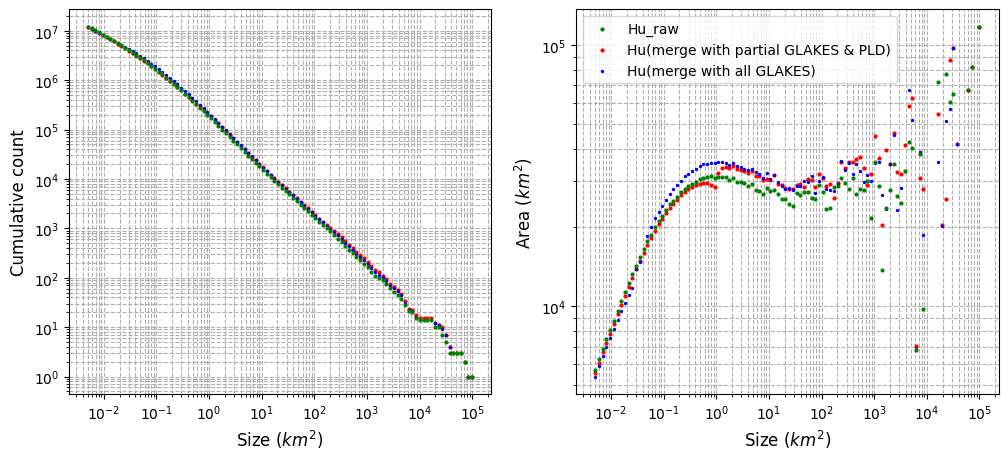

In [331]:
fig=plt.figure(figsize=(12,5))#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(1,2)
color_list=['yellow','black','green','purple','red','blue']
bound_list=['orange','black','green','purple','red','blue']
label_list=['PLD','GLAKES_new','Hu_raw','Hu(mw GLAKES partial)','Hu(merge with partial GLAKES & PLD)','Hu(merge with all GLAKES)']
ax1=plt.subplot(gs[0,0])
ax1.grid(True, which="both", ls="--",zorder=1)
# ax1.scatter(bins_P[:-1], P_c, color=color_list[0], edgecolor=bound_list[0],label=label_list[0],s=8,zorder=1)
# ax1.scatter(bins_G[:-1], newG_c, color=color_list[1], edgecolor=bound_list[1],label=label_list[1],s=4,zorder=2)
ax1.scatter(bins[:-1], B_c, color=color_list[2], edgecolor=bound_list[2],label=label_list[2],s=4,zorder=3)
# ax1.scatter(bins[:-1], C1_c, color=color_list[3], edgecolor=bound_list[3],label=label_list[3],s=4,zorder=2)
ax1.scatter(bins[:-1], C2_c, color=color_list[4], edgecolor=bound_list[4],label=label_list[4],s=4,zorder=2)
ax1.scatter(bins[:-1], C3_c, color=color_list[5], edgecolor=bound_list[5],label=label_list[5],s=2,zorder=2)
ax1.set_xscale('log')  # 设置x轴为对数尺度
ax1.set_yscale('log')  # 设置y轴为对数尺度
ax1.set_xlabel('Size ($km^2$)', fontsize=12)
ax1.set_ylabel('Cumulative count', fontsize=12)


ax2=plt.subplot(gs[0,1])
ax2.grid(True, which="both", ls="--",zorder=1)
# ax2.scatter(bins_P[:-1], P_a, color=color_list[0], edgecolor=bound_list[0],label=label_list[0],s=8,zorder=1)
# ax2.scatter(bins_G[:-1], newG_a, color=color_list[1], edgecolor=bound_list[1],label=label_list[1],s=4,zorder=2)
ax2.scatter(bins[:-1], B_a, color=color_list[2], edgecolor=bound_list[2],label=label_list[2],s=4,zorder=3)
# ax2.scatter(bins[:-1], C1_a, color=color_list[3], edgecolor=bound_list[3],label=label_list[3],s=4,zorder=2)
ax2.scatter(bins[:-1], C2_a, color=color_list[4], edgecolor=bound_list[4],label=label_list[4],s=4,zorder=2)
ax2.scatter(bins[:-1], C3_a, color=color_list[5], edgecolor=bound_list[5],label=label_list[5],s=2,zorder=2)
ax2.set_xscale('log')  # 设置x轴为对数尺度
ax2.set_yscale('log')  # 设置y轴为对数尺度
ax2.set_xlabel('Size ($km^2$)', fontsize=12)
ax2.set_ylabel('Area ($km^2$)', fontsize=12)
plt.legend()
# plt.show()

In [ ]:
for i in range(0,104):
    print(f'{bins[i]:.3f} {C1_a[i]}')